<a href="https://colab.research.google.com/github/CamillaSemenzzatt/PROJETO-APLICADO-III/blob/main/Base%20de%20Posi%C3%A7%C3%A3o%20de%20ocupa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O Pessoas_ocupadas_posicao.xlsx 'https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/383d04893445ae76f3efdf825541b46deb23d94a/Pessoas%20de%2014%20anos%20ou%20mais%20de%20idade%2C%20ocupadas%20na%20semana%20de%20refer%C3%AAncia%2C%20por%20posi%C3%A7%C3%A3o%20na%20ocupa%C3%A7%C3%A3o%20no%20trabalho%20principal.xlsx

tabela = pd.read_excel('Pessoas_ocupadas_posicao.xlsx')

print(tabela)

--2025-03-22 20:26:09--  https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/383d04893445ae76f3efdf825541b46deb23d94a/Pessoas%20de%2014%20anos%20ou%20mais%20de%20idade%2C%20ocupadas%20na%20semana%20de%20refer%C3%AAncia%2C%20por%20posi%C3%A7%C3%A3o%20na%20ocupa%C3%A7%C3%A3o%20no%20trabalho%20principal.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132829 (130K) [application/octet-stream]
Saving to: ‘Pessoas_ocupadas_posicao.xlsx’

Pessoas_ocupadas_po 100%[===================>] 129.72K  --.-KB/s    in 0.03s   

2025-03-22 20:26:09 (4.89 MB/s) - ‘Pessoas_ocupadas_posicao.xlsx’ saved [132829/132829]

     Tabela 4096 - Pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, por posição na ocupação no trabalho principal  

In [ ]:
tabela = tabela.drop([0, 1])
tabela = tabela.reset_index(drop=True)

tabela = tabela.rename(columns={
    'Tabela 4096 - Pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, por posição na ocupação no trabalho principal': 'municipio',
    'Unnamed: 1': 'posição de ocupação',
    'Unnamed: 2': 'trimestre',
    'Unnamed: 3': 'quantidade'
})

ultima_palavra_valida = {coluna: None for coluna in tabela.columns}

for index, row in tabela.iterrows():
    for coluna in tabela.columns:
        if pd.isnull(row[coluna]):
            if ultima_palavra_valida[coluna] is not None:
                row[coluna] = ultima_palavra_valida[coluna]
        else:
            ultima_palavra_valida[coluna] = row[coluna]
            for outra_coluna in tabela.columns:
                if outra_coluna != coluna and pd.isnull(row[outra_coluna]):
                    ultima_palavra_valida[outra_coluna] = None

tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)

tabela = tabela.drop(tabela.index[-1])

In [ ]:
from tabulate import tabulate

tabela_lista = tabela.values.tolist()

tabela_lista.insert(0, tabela.columns.tolist())

print(tabulate(tabela_lista, headers="firstrow", tablefmt="grid"))

+---------------------+-------------------------------+-------------------+--------------+
| municipio           | posição de ocupação           | trimestre         |   quantidade |
+=====================+===============================+===================+==============+
| Porto Velho (RO)    | Empregado                     | 1º trimestre 2013 |          162 |
+---------------------+-------------------------------+-------------------+--------------+
| Porto Velho (RO)    | Empregado                     | 2º trimestre 2013 |          160 |
+---------------------+-------------------------------+-------------------+--------------+
| Porto Velho (RO)    | Empregado                     | 3º trimestre 2013 |          159 |
+---------------------+-------------------------------+-------------------+--------------+
| Porto Velho (RO)    | Empregado                     | 4º trimestre 2013 |          154 |
+---------------------+-------------------------------+-------------------+--------------+

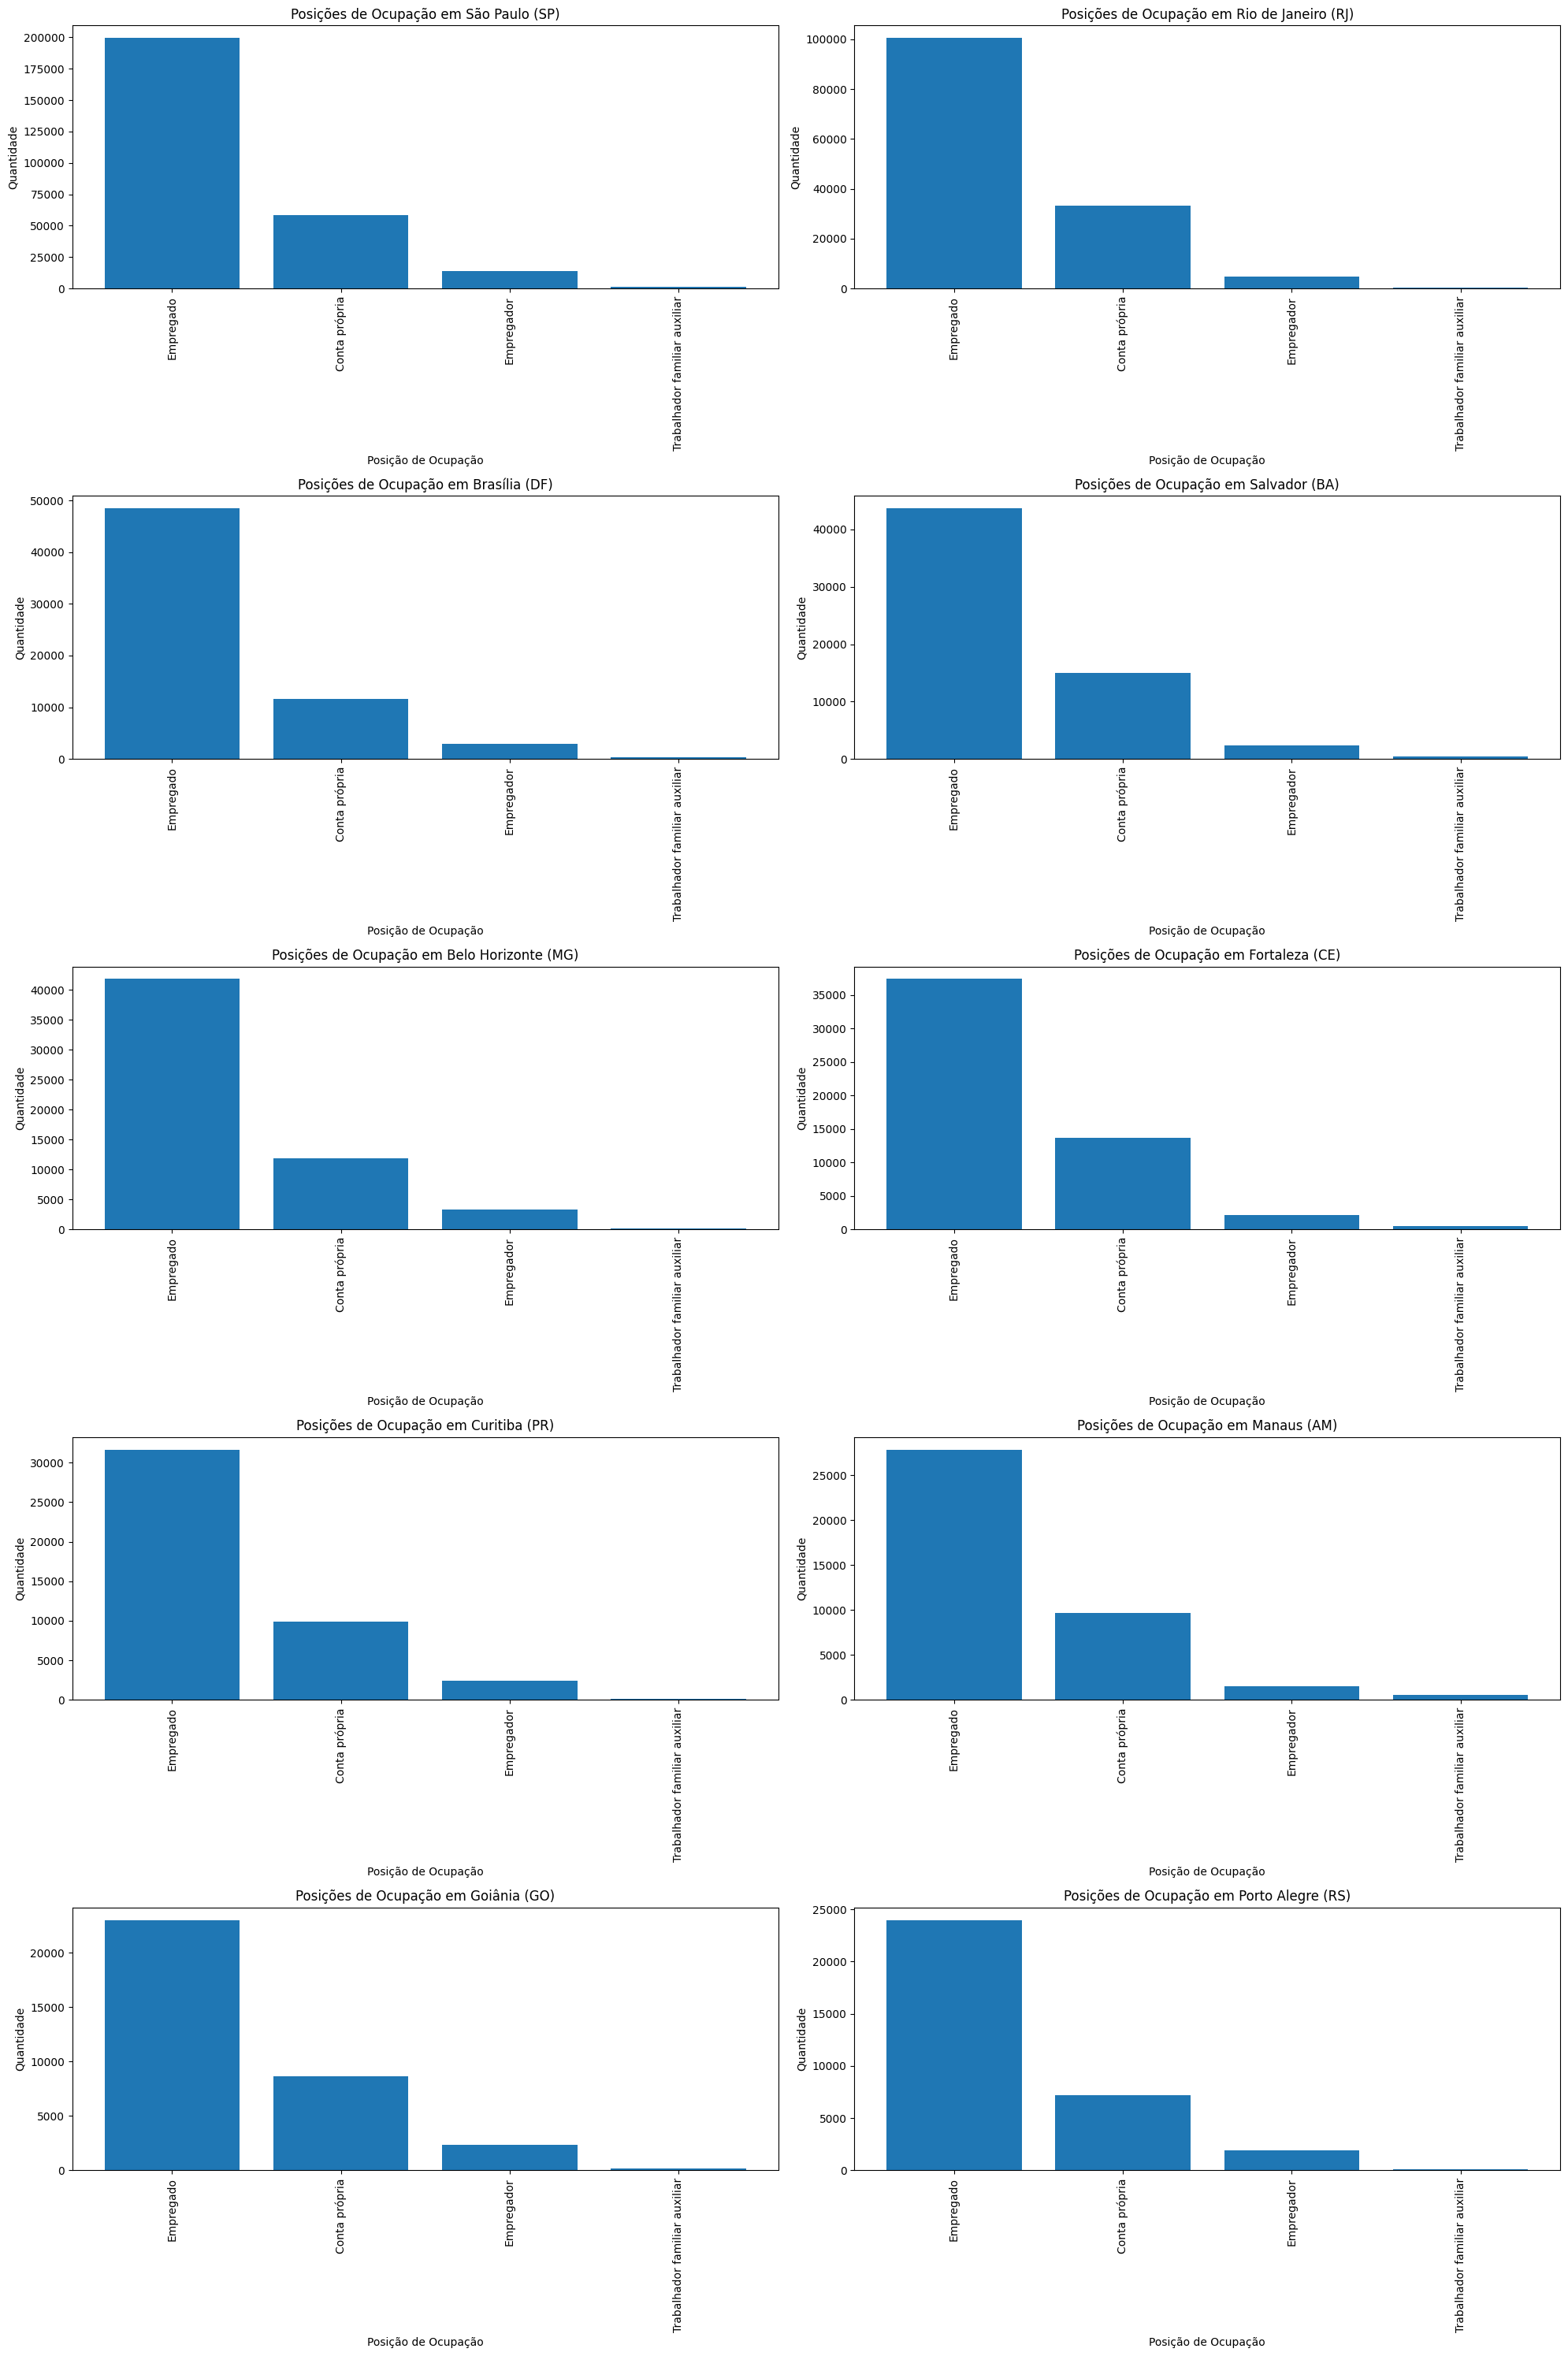

In [ ]:
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()

maiores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=False).head(10)['municipio'].tolist()

fig, axes = plt.subplots(5, 2, figsize=(20, 30))


for i, municipio in enumerate(maiores_ofensores):
    linha = i // 2
    coluna = i % 2

    dados_municipio = tabela[tabela['municipio'] == municipio]

    dados_agrupados_posicao = dados_municipio.groupby('posição de ocupação')['quantidade'].sum().reset_index()

    dados_agrupados_posicao = dados_agrupados_posicao.sort_values(by=['quantidade'], ascending=False)

    axes[linha, coluna].bar(dados_agrupados_posicao['posição de ocupação'], dados_agrupados_posicao['quantidade'])
    axes[linha, coluna].set_xlabel('Posição de Ocupação')
    axes[linha, coluna].set_ylabel('Quantidade')
    axes[linha, coluna].set_title(f'Posições de Ocupação em {municipio}')
    axes[linha, coluna].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

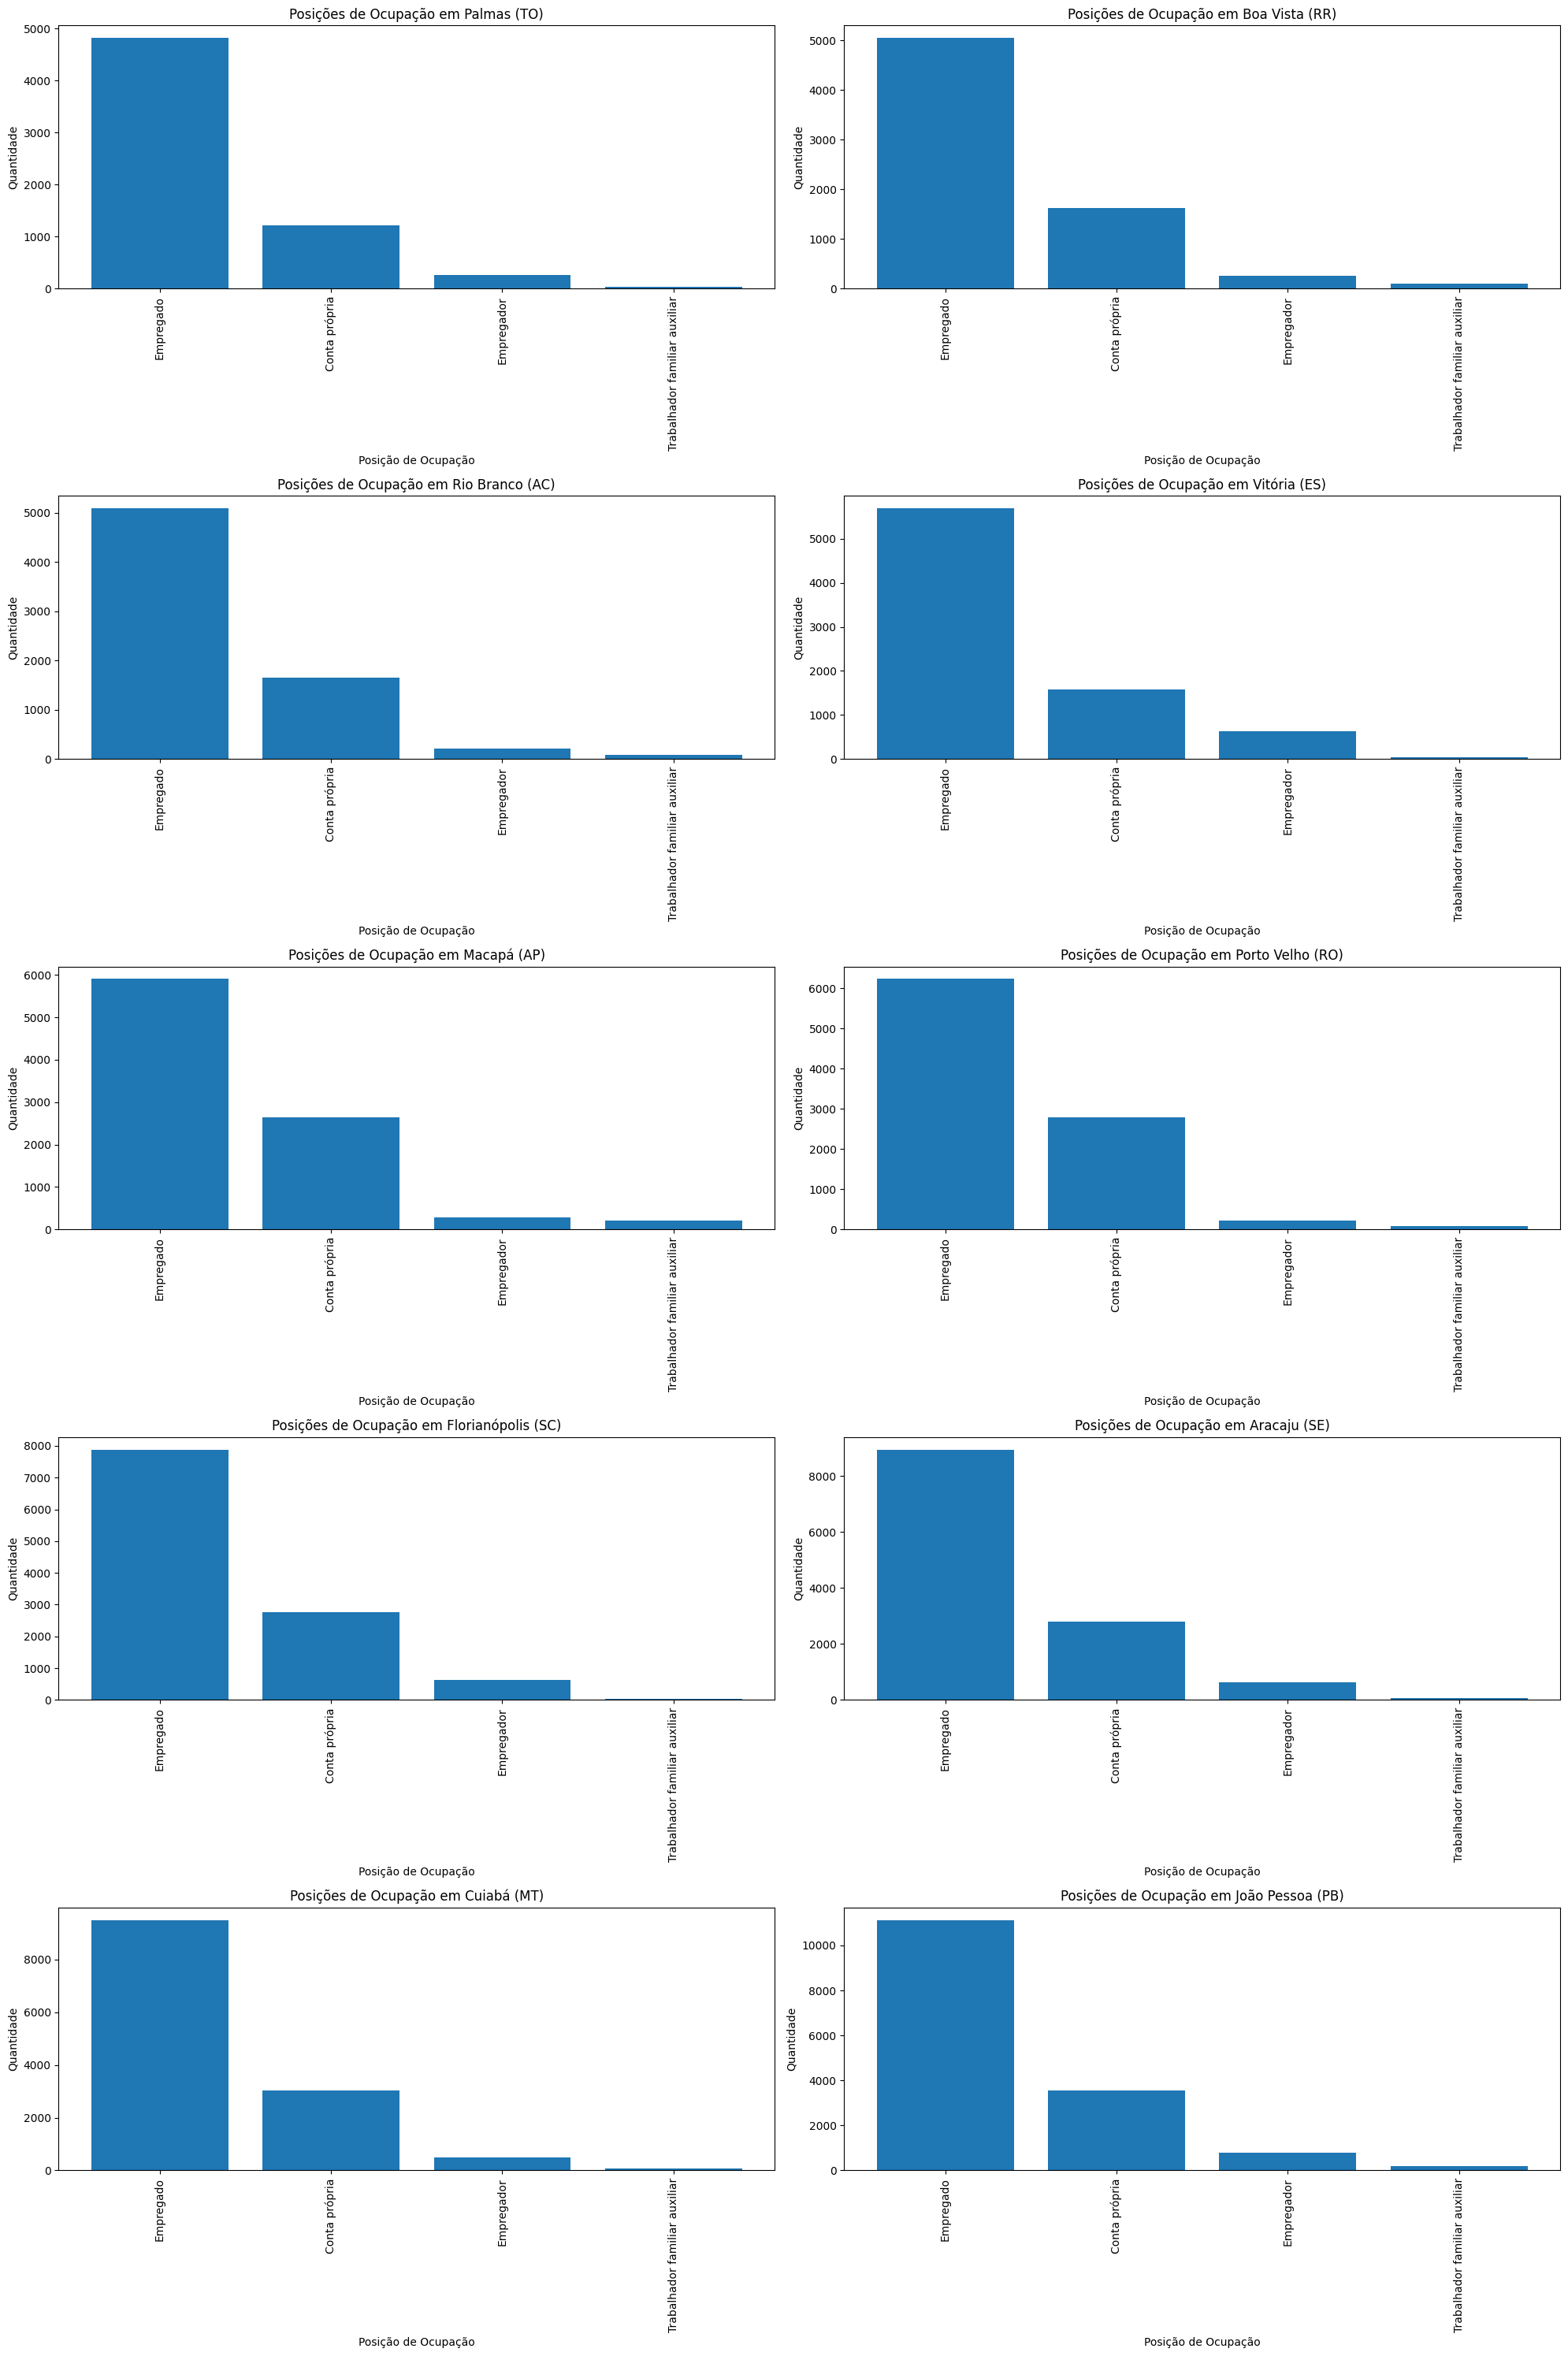

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()

menores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=True).head(10)['municipio'].tolist()

fig, axes = plt.subplots(5, 2, figsize=(20, 30))
for i, municipio in enumerate(menores_ofensores):
    linha = i // 2
    coluna = i % 2

    dados_municipio = tabela[tabela['municipio'] == municipio]

    dados_agrupados_posicao = dados_municipio.groupby('posição de ocupação')['quantidade'].sum().reset_index()

    dados_agrupados_posicao = dados_agrupados_posicao.sort_values(by=['quantidade'], ascending=False)

    axes[linha, coluna].bar(dados_agrupados_posicao['posição de ocupação'], dados_agrupados_posicao['quantidade'])
    axes[linha, coluna].set_xlabel('Posição de Ocupação')
    axes[linha, coluna].set_ylabel('Quantidade')
    axes[linha, coluna].set_title(f'Posições de Ocupação em {municipio}')
    axes[linha, coluna].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()